This is a Generalized code to obtain the impulse response, and the output for a given input for any LTIC whose dynamics in 
terms of differential equations(maximum order 2 and minimum order 1) is known to us.

Assume the dynamics as Q(D)*x(t)=P(D)*R(t) where Q(D)=aD^2+bD+c and P(D)=dD^2+eD+f and condition P(D) order <= Q(D) order 
must be taken for practical noise considerations 

enter a value i.e coeffecient of x^2 in Q(D) 1
enter b value i.e coeffecient of x in Q(D) 2
enter c value i.e constant term in Q(D) 1
enter d value i.e coeffecient of D^2 in P(D) 0
enter e value i.e coeffient of D in P(D) 1
enter f value i.e constant term in P(D) 0

Zero input response =  t*exp(-1.0*t)

Unit Impulse response =  u(t)*(-1.0*t*exp(-1.0*t) + 1.0*exp(-1.0*t))

Step response = [ 1.0*t*exp(-1.0*t) ]*u(t)

Output = [ 2.0*t*exp(-1.0*t) ]*u(t)


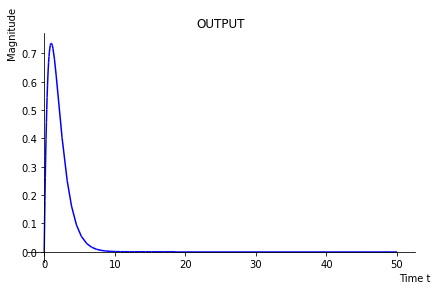

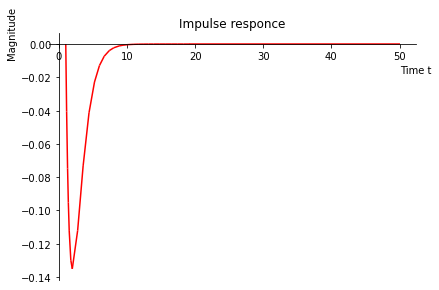

Value of Impulse response at t=0 is 0.0


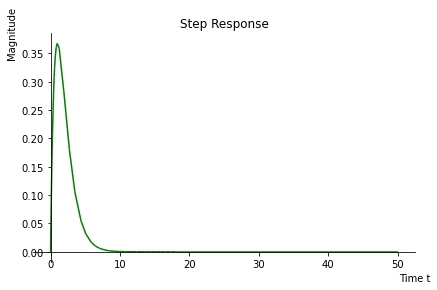

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as smp
import warnings
warnings.filterwarnings('ignore')
import sys

t = smp.symbols('t', real = True)
m,n = smp.symbols('m,n', real = True)

print("This is a Generalized code to obtain the impulse response, and the output for a given input for any LTIC whose dynamics in \nterms of differential equations(maximum order 2 and minimum order 1) is known to us.\n")
print("Assume the dynamics as Q(D)*x(t)=P(D)*R(t) where Q(D)=aD^2+bD+c and P(D)=dD^2+eD+f and condition P(D) order <= Q(D) order \nmust be taken for practical noise considerations \n")


def solver(a1,b1,c1):
    if a1==0:
        m = 1
        eqt = m*smp.exp(-c1*t/b1)
        return eqt
    else:
        x1 = (-b1 + (b1**2 - 4*a1*c1)**0.5)/2*a1
        x2 = (-b1 - (b1**2 - 4*a1*c1)**0.5)/2*a1
        if x1==x2:
            m = 0
            n = 1
            eqt = (m + n*t)* smp.exp(x1*t)
            return eqt
        elif x1!=x2:
            m = -1/(x2-x1)
            n = 1/(x2-x1)
            eqt = m*smp.exp(x1*t) + n*smp.exp(x2*t)
            return eqt

        
def unit_impulse_response(a2,b2,c2,flag):
    if flag==True:
        unit = smp.symbols('u(t)', real = True)
        delta = smp.symbols('δ(t)', real = True)
    elif flag == False:
        unit,delta = 1,0
    if a1==0:
        return b2*delta + (a2*(smp.diff(solver(a1,b1,c1),t,t)) + b2*smp.diff(solver(a1,b1,c1)) + c2*solver(a1,b1,c1))*unit
        #return ans
    else:
        return a2*delta + (a2*smp.diff(smp.diff(solver(a1,b1,c1))) + b2*smp.diff(solver(a1,b1,c1)) + c2*solver(a1,b1,c1))*unit
        #return ans
#unit_impulse(0,1,2,0,3,5)

def zero_state_response(a1,b1,c1,a2,b2,c2):
    if a1==0:
        return b2 + smp.integrate((a2*(smp.diff(solver(a1,b1,c1),t,t)) + b2*smp.diff(solver(a1,b1,c1),t) + c2*solver(a1,b1,c1)),(t,0,t))
    else:
        return a2 + smp.integrate((a2*(smp.diff(solver(a1,b1,c1),t,t)) + b2*smp.diff(solver(a1,b1,c1),t) + c2*solver(a1,b1,c1)),(t,0,t))
    
# write the equations of the left side
a1 = float(input("enter a value i.e coeffecient of x^2 in Q(D) "))
b1 = float(input("enter b value i.e coeffecient of x in Q(D) "))
c1 = float(input("enter c value i.e constant term in Q(D) "))
# write the equation on the right side
a2 = float(input("enter d value i.e coeffecient of D^2 in P(D) "))
b2 = float(input("enter e value i.e coeffient of D in P(D) "))
c2 = float(input("enter f value i.e constant term in P(D) "))

if(a1==0 and a2!=0):
    sys.exit("In practical noise considerations,we require P(D) order <= Q(D) order. Please re enter values accordingly")
elif(a1==b1==0 or a2==b2==0):
    sys.exit("Please check the orders. Minimim and maximum orders of Q(D) and P(D) are 1 and 2 respectively")

else:
    flag = True
    Xi = solver(a1,b1,c1)
    h = unit_impulse_response(a2,b2,c2,flag)
    print('\nZero input response = ',Xi)
    print('\nUnit Impulse response = ',h)
    Xs = zero_state_response(a1,b1,c1,a2,b2,c2)
    print('\nStep response = [',Xs,']*u(t)')
    Xo = Xi+Xs
    print('\nOutput = [',Xo,']*u(t)')
    
#Xo = 2.5 + 1.5*smp.exp(-2.0*t)
graph1 = smp.plot(Xo,(t,0,50),show = False,title = 'OUTPUT',xlabel = 'Time t',ylabel = 'Magnitude',line_color='b')
graph1.show()

def h1():
    if a1==0:
        return b2
    else:
        return a2
#(h1(),(t,-0.1,0.1)),
# At t=0 
h2 = unit_impulse_response(a2,b2,c2,False)
graph2 = smp.plot((h2,(t,1,50)),show = False,title = 'Impulse responce',xlabel = 'Time t',ylabel = 'Magnitude',line_color='r')
#graph2.extend(smp.plot((h1(),(t,0,0.01)),show = False,legend=True,line_color='b'))
graph2.show()
print('Value of Impulse response at t=0 is',h1())

graph3 = smp.plot(Xs,(t,0,50),show = False,title = 'Step Response',xlabel = 'Time t',ylabel = 'Magnitude',line_color='g')
graph3.show()
    


# In[ ]:






In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


#SnS Assignment   BT20EEE108 Jyoshna Vallabhaneni

import numpy as np
from matplotlib import pyplot as plt
import sympy as smp
import warnings
warnings.filterwarnings('ignore')
import sys

t = smp.symbols('t', real = True)
m,n = smp.symbols('m,n', real = True)

print("This is a Generalized code to obtain the impulse response, and the output for a given input for any LTIC whose dynamics in \nterms of differential equations(maximum order 2 and minimum order 1) is known to us.\n")
print("Assume the dynamics as Q(D)*x(t)=P(D)*R(t) where Q(D)=aD^2+bD+c and P(D)=dD^2+eD+f and condition P(D) order <= Q(D) order \nmust be taken for practical noise considerations \n")


def solver(a,b,c):
    if a==0:
        m = 1
        eqt = m*smp.exp(-c*t/b)
        return eqt
    else:
        x1 = (-b + (b**2 - 4*a*c)**0.5)/2*a
        x2 = (-b - (b**2 - 4*a*c)**0.5)/2*a
        if x1==x2:
            m = 0
            n = 1
            eqt = (m + n*t)* smp.exp(x1*t)
            return eqt
        elif x1!=x2:
            m = -1/(x2-x1)
            n = 1/(x2-x1)
            eqt = m*smp.exp(x1*t) + n*smp.exp(x2*t)
            return eqt

        
def unit_impulse_response(d,e,f,flag):
    if flag==True:
        unit = smp.symbols('u(t)', real = True)
        delta = smp.symbols('δ(t)', real = True)
    elif flag == False:
        unit,delta = 1,0
    if a==0:
        return e*delta + (d*(smp.diff(solver(a,b,c),t,t)) + e*smp.diff(solver(a,b,c)) + f*solver(a,b,c))*unit
        #return ans
    else:
        return d*delta + (d*smp.diff(smp.diff(solver(a,b,c))) + e*smp.diff(solver(a,b,c)) + f*solver(a,b,c))*unit
        #return ans
#unit_impulse(0,1,2,0,3,5)

def zero_state_response(a,b,c,d,e,f):
    if a==0:
        return e + smp.integrate((d*(smp.diff(solver(a,b,c),t,t)) + e*smp.diff(solver(a,b,c),t) + f*solver(a,b,c)),(t,0,t))
    else:
        return d + smp.integrate((d*(smp.diff(solver(a,b,c),t,t)) + e*smp.diff(solver(a,b,c),t) + f*solver(a,b,c)),(t,0,t))
    
# write the equations of the left side
a = float(input("enter a value i.e coeffecient of x^2 in Q(D) "))
b = float(input("enter b value i.e coeffecient of x in Q(D) "))
c = float(input("enter c value i.e constant term in Q(D) "))
# write the equation on the right side
d = float(input("enter d value i.e coeffecient of D^2 in P(D) "))
e = float(input("enter e value i.e coeffient of D in P(D) "))
f = float(input("enter f value i.e constant term in P(D) "))

if(a==0 and d!=0):
    sys.exit("In practical noise considerations,we require P(D) order <= Q(D) order. Please re enter values accordingly")
elif(a==b==0 or d==e==0):
    sys.exit("Please check the orders. Minimim and maximum orders of Q(D) and P(D) are 1 and 2 respectively")

else:
    flag = True
    Xi = solver(a,b,c)
    h = unit_impulse_response(d,e,f,flag)
    print('\nZero input response = ',Xi)
    print('\nUnit Impulse response = ',h)
    Xs = zero_state_response(a,b,c,d,e,f)
    print('\nStep response = [',Xs,']*u(t)')
    Xo = Xi+Xs
    print('\nOutput = [',Xo,']*u(t)')
    
#Xo = 2.5 + 1.5*smp.exp(-2.0*t)
graph1 = smp.plot(Xo,(t,0,50),show = False,title = 'OUTPUT',xlabel = 'Time t',ylabel = 'Magnitude',line_color='b')
graph1.show()

def h1():
    if a==0:
        return e
    else:
        return d
#(h1(),(t,-0.1,0.1)),
# At t=0 
h2 = unit_impulse_response(d,e,f,False)
graph2 = smp.plot((h2,(t,1,50)),show = False,title = 'Impulse responce',xlabel = 'Time t',ylabel = 'Magnitude',line_color='r')
#graph2.extend(smp.plot((h1(),(t,0,0.01)),show = False,legend=True,line_color='b'))
graph2.show()
print('Value of Impulse response at t=0 is',h1())

graph3 = smp.plot(Xs,(t,0,50),show = False,title = 'Step Response',xlabel = 'Time t',ylabel = 'Magnitude',line_color='g')
graph3.show()
    


# In[ ]:




